<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#План-работы" data-toc-modified-id="План-работы-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>План работы</a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек-и-загрузка-данных" data-toc-modified-id="Подключение-библиотек-и-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек и загрузка данных</a></span></li><li><span><a href="#Ресемплирование-данных" data-toc-modified-id="Ресемплирование-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ресемплирование данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Создание-новых-переменных" data-toc-modified-id="Создание-новых-переменных-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Создание новых переменных</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#SGDRegressor" data-toc-modified-id="SGDRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SGDRegressor</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия---предсказание" data-toc-modified-id="Линейная-регрессия---предсказание-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия - предсказание</a></span></li><li><span><a href="#SGDRegressor.-Предсказание" data-toc-modified-id="SGDRegressor.-Предсказание-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SGDRegressor. Предсказание</a></span></li><li><span><a href="#Градиентный-бустинг.-Предсказание" data-toc-modified-id="Градиентный-бустинг.-Предсказание-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Градиентный бустинг. Предсказание</a></span></li><li><span><a href="#CatBoostRegressor.-Предсказание" data-toc-modified-id="CatBoostRegressor.-Предсказание-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>CatBoostRegressor. Предсказание</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

### План работы

1. Сначала я загружу данные и изучу их. 
2. Затем проведу преобработку данных и приведу к данные к удобному формату. Проведу ресемплирование по одному часу. 
3. Проанализирую данные. Проверю ряд на стационарность. Приведу к стационарному виду. 
3. Обучу разные модели.  
4. Проверю данные на тестовой выборке. Преобразую предсказанные значения в исходный формат, если преобразовывала исходные данные.
5. Сделаю общий вывод. 

## Подготовка 

### Подключение библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


import statsmodels.api as sm # все, для работы с рядами

from statsmodels.tsa.seasonal import seasonal_decompose # для разделения на тренд, сезонность и остатки
from sklearn.metrics import mean_squared_error # импорт метрики качества 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# импорт моделей 
from sklearn.linear_model import LinearRegression, SGDRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# чтение данных
try:
    data = pd.read_csv('/datasets/taxi.csv')
except:
    data = pd.read_csv('taxi.csv')

In [3]:
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


**Краткий вывод**

1. В датасете два столбца: 
    - `datetime` - столбец со значениями даты и времени на временной оси. Интервал времени равен 10 минутам. 
    - `num_orders` - столбец с числом заказов в течение 10 минут.   

И `26496` объектов.  
Данные полные. 

2. Нужно привезти данные к удобному формату. 


In [5]:
# снова загрузим данные, но уже сделаем первый столбец - столбцом индексов c нужным форматом 

try:
    data = pd.read_csv('/datasets/taxi.csv',  parse_dates=[0], index_col=[0])
except:
    data = pd.read_csv('taxi.csv',  parse_dates=[0], index_col=[0])
    
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
# проверим отсортированы ли индексы,
# иными словами выясним расположены данные в хронологическом порядке

# data.sort_index(inplace=True)

print(data.index.is_monotonic)

True


Да, наши данные расположены в хронологическом порядке. 

Выясним за какой период у нас есть данные в датасете. 

In [7]:
[data.index.min(), data.index.max()]

[Timestamp('2018-03-01 00:00:00'), Timestamp('2018-08-31 23:50:00')]

В датасете есть данные с 1 марта 2018 по 31 августа 2018 года. Напомню, что интервал времени равен 10 минутам. Нарисуем график.

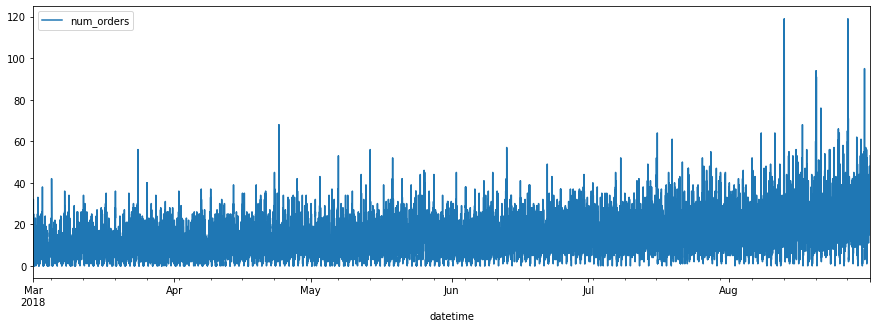

In [8]:
plt.figure(figsize=(15,5))

data.plot(ax=plt.gca());

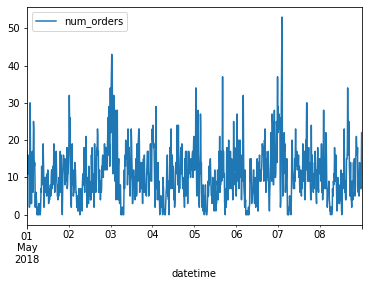

In [9]:
# нарисуем график за небольшой участок времени

data_intervel = data['2018-05-01':'2018-05-08']
data_intervel.plot(ax=plt.gca());

Так график выглядит более ясным, можно увидеть тренд и сезонность. 

Перейдем к предобработке данных. 

### Ресемплирование данных

Перед нами стоит задача спрогнозировать количество заказов такси на следующий час. Нужно поменять интервал времени с 10 минут до 1 часа. Для агрегации значений выберем среднее за интервал времени.

<div class="alert alert-block alert-info">
<b>Изменения:</b> Заменила min() на sum()
</div>

In [10]:
# среднее по каждому часу
data = data.resample('1H').sum()

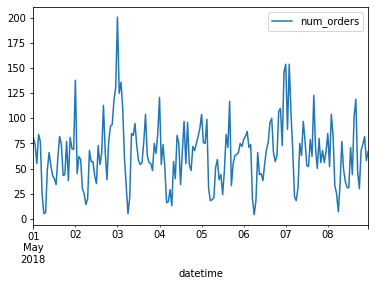

In [11]:
data['2018-05-01':'2018-05-08'].plot(ax=plt.gca());

Выполнили ресемплирование данных. График выглядит теперь более симпотичным. 

Перейдем к анализу данных.


## Анализ

Построим график по нашим данным. 

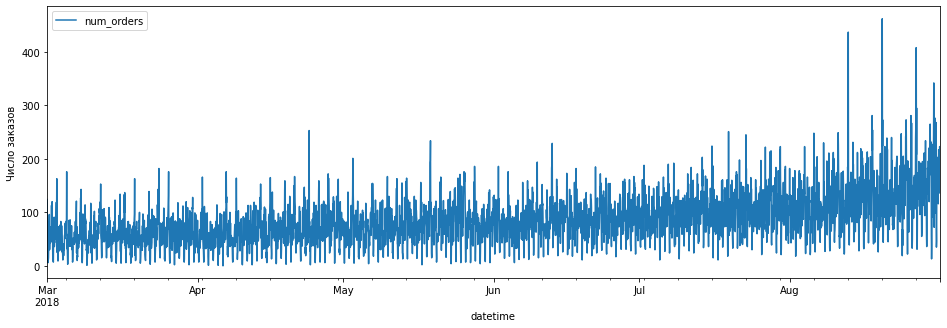

In [12]:
plt.figure(figsize=(16,5))
data.plot(ax=plt.gca())
plt.ylabel('Число заказов')
plt.show();

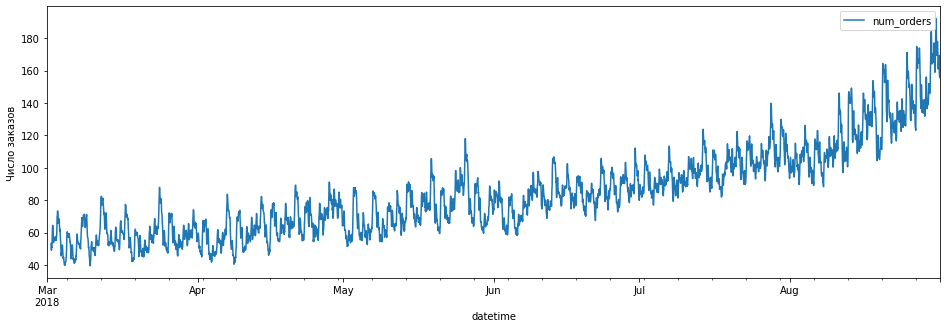

In [13]:
plt.figure(figsize=(16,5))
data.rolling(20).mean().plot(ax=plt.gca())
plt.ylabel('Число заказов')
plt.show();

Видим, что число заказов с июля начинается возрастать, а в августе и вовсе принимает наибольшие значения. Период отпусков)))

Посмотрим еще на тренды и сезонность. 

Для этого воспользуемчя инструментом для визуального анализа ряда — его **STL-декомпозиция**. 

<Figure size 1152x720 with 0 Axes>

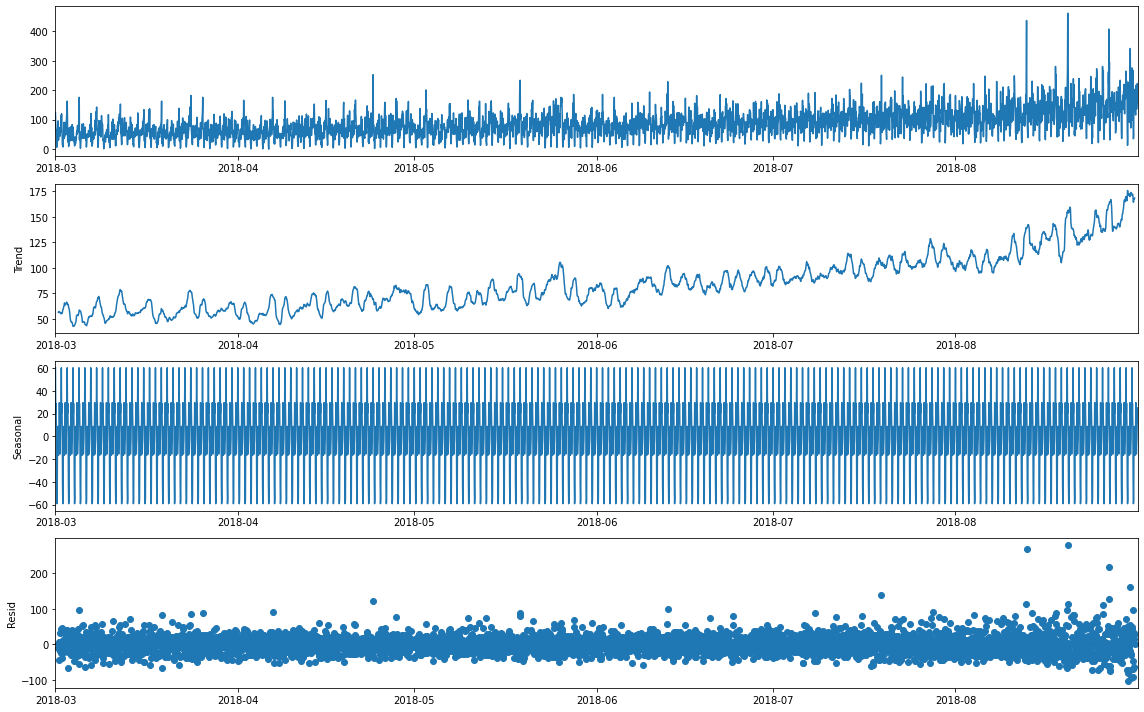

In [14]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(data).plot()
plt.show()

Еще раз убеждаемся, что летом число заказов в аэропортах растет.

Можно уменьшить участок времени, чтобы поближе посмотреть на сезонность. 

In [15]:
decomposed = seasonal_decompose(data)

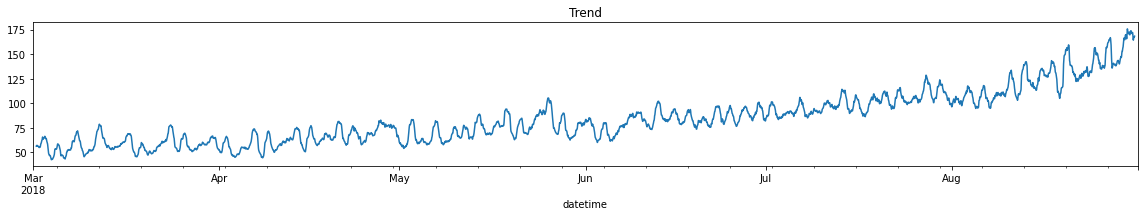

In [16]:
# Чтобы график корректно отобразился, указываем его 
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)

plt.figure(figsize=(16,8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.tight_layout()

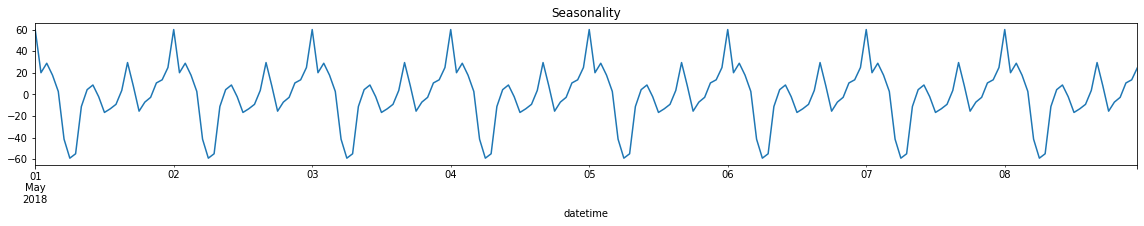

In [17]:
plt.figure(figsize=(16, 8))
plt.subplot(312)
decomposed.seasonal['2018-05-01':'2018-05-08'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.tight_layout()

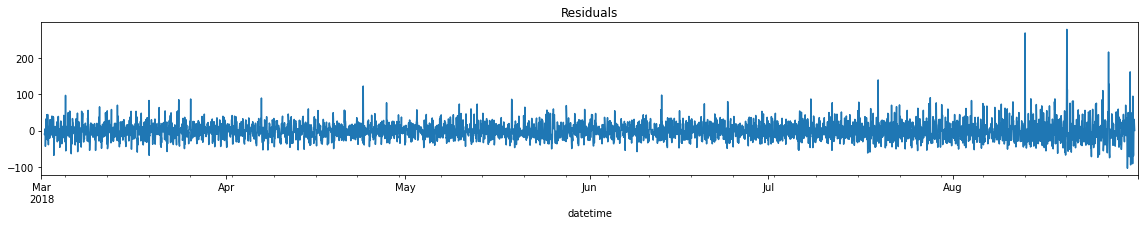

In [18]:
plt.figure(figsize=(16, 8))
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Из графика можно предположить, что наш ряд нестационарен, такие ряды сложно прогнозировать. Проверим гипотезу статистически. 

In [19]:
print("Критерий Дики-Фуллера для начального ряда: pvalue =", sm.tsa.stattools.adfuller(data['num_orders'])[1])

Критерий Дики-Фуллера для начального ряда: pvalue = 0.028940051402612906


<div class="alert alert-block alert-info">
<b>Изменения:</b> Я удалила часть с дифференцированием. Нулевая гипотеза отвергается на этих данных, к тому далее возникают трудности при обучениии модели с дифференцированными данными. 
</div>

Нулевая гипотеза о нестационарности ряда отвергается на уровне 5%. 


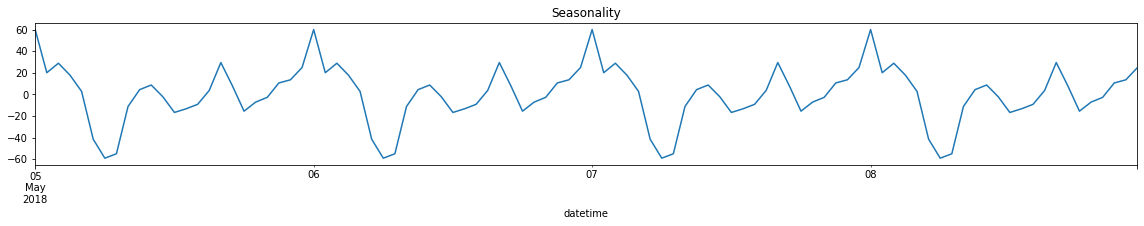

In [20]:
# еще раз декомпозируем данные
decomposed = seasonal_decompose(data['num_orders'].dropna())

plt.figure(figsize=(16, 8))
plt.subplot(312)
decomposed.seasonal['2018-05-05':'2018-05-08'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.tight_layout()

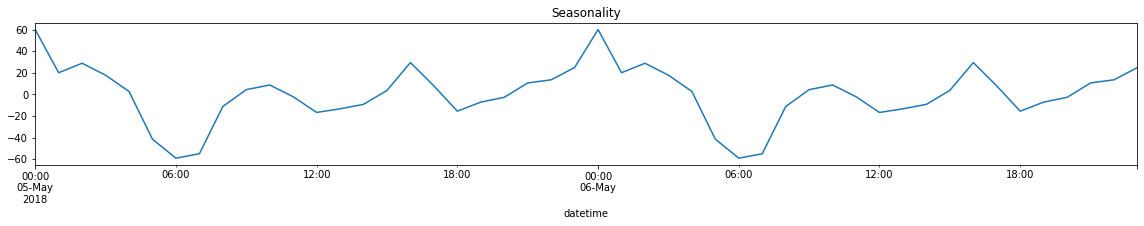

In [21]:
plt.figure(figsize=(16, 8))
plt.subplot(312)
decomposed.seasonal['2018-05-05':'2018-05-06'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.tight_layout()

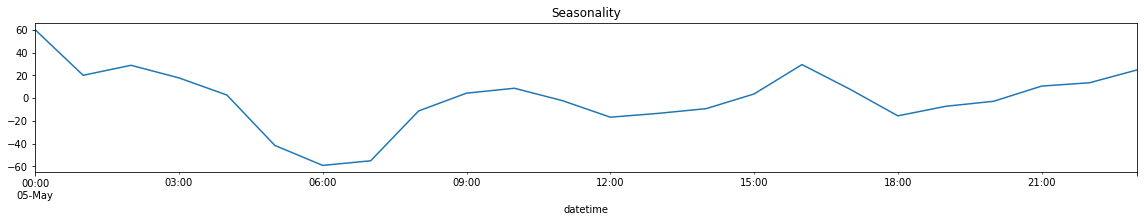

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(312)
decomposed.seasonal['2018-05-05':'2018-05-05'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.tight_layout()

Судя по графикам, сезонность получается дневная. Пиковое значение достигается в полуночь. В дневное время с девяти утра и где-то до трех-четырех вечера наблюдается средний уровень заказов, которые затем возрастает, а после шести вечера и до полуночи тоже число заказов растет. 


#### Создание новых переменных 

Здесь и далее будем использовать данные data_shift 

In [23]:
# напишем функцию для создания признаков

def make_features(data, max_lag, rolling_mean_size):
    # календарные признаки 
    data_new = data.copy()
    data_new['month'] = data.index.month
    data_new['dayofweek'] = data.index.dayofweek
    data_new['hour'] = data.index.hour
    # отстающие значения 
    for lag in range(1, max_lag + 1):
        data_new['lag_{}'.format(lag)] = data_new['num_orders'].shift(lag)
    # скользящее среднее 
    # shift(1) - делаем для того, чтобы скользящее среднее не включало в себя текущее значение ряда
    data_new['rolling_mean'] = data_new['num_orders'].shift(1).rolling(rolling_mean_size).sum()
    return(data_new)

Логика подбора гиперпараметоров после обсужедния с ревьюером:

1. Фактор год: НЕТ. У нас данных меньше года, поэтому будет просто константа.
2. Фактор месяц: НЕТ. Тренд будет и без месяца прослеживаться.
3. Фактор день: НЕТ. Также не подходит - будет просто последовательность чисел.
4. Фактор день недели: ДА. Так как у нас есть недельная сезонность.
5. Фактор час: ДА. Так как есть часовая (суточная) сезонность.
6. Фактор lag: ДА. Это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.
7. Фактор rolling: ДА. Это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.


In [24]:
data_new = make_features(data, 1, 24)

In [25]:
data_new.head(10)

,num_orders,month,dayofweek,hour,lag_1,rolling_mean
datetime,,,,,,
2018-03-01 00:00:00,124,3,3,0,NaN,NaN
2018-03-01 01:00:00,85,3,3,1,124.0,NaN
2018-03-01 02:00:00,71,3,3,2,85.0,NaN
2018-03-01 03:00:00,66,3,3,3,71.0,NaN
2018-03-01 04:00:00,43,3,3,4,66.0,NaN
2018-03-01 05:00:00,6,3,3,5,43.0,NaN
2018-03-01 06:00:00,12,3,3,6,6.0,NaN
2018-03-01 07:00:00,15,3,3,7,12.0,NaN
2018-03-01 08:00:00,34,3,3,8,15.0,NaN


**Краткий вывод** 

Стабилизровали ряд.  
Создали новые признаки.  
Данные готовы к обучению. 

## Обучение

In [26]:
# разделение выборки на обучающую и тренировочную
train, test = train_test_split(data_new.dropna(), shuffle=False, test_size=0.1)

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-08-13 15:00:00
2018-08-13 16:00:00 2018-08-31 23:00:00


In [27]:
features_train = train.drop(['num_orders'], axis=1)
features_test = test.drop(['num_orders'], axis=1)

target_train = train['num_orders']
target_test = test['num_orders']

Наши данные разделены корректно. Монотонность индексов сохраняется. 


В этом разделе я обучу 4 модели:
- линейную регрессию;
- SGDRegressor(); 
- градиентный бустинг;
- CatBoostRegressor().

### Линейная регрессия 

In [28]:
# обучение модели
start_time = time.time()

linear_model = LinearRegression(normalize=True) 
linear_model.fit(features_train, target_train)

linear_model_fit_time = time.time() - start_time

In [29]:
# Проверим качество модели на кросс-валидации

tscv = TimeSeriesSplit(n_splits=10) #честно говоря, я не нашла правила подбора параметра и остановилась на 10
# потому что RMSE получается равным 34, а дальше ошибка уменьшается медленнее
cv_rmse_linear_model = (cross_val_score(linear_model, 
                             features_train, 
                             target_train, 
                             cv=tscv, 
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5

print('RMSE на кросс-валидации равен', cv_rmse_linear_model)

RMSE на кросс-валидации равен 32.906484792114426


**Краткий вывод** 

Линейная регрессия на обучающей выборке показывает хороший показатель `RMSE`.

### SGDRegressor

In [30]:
start_time = time.time()

sgd_regressor = SGDRegressor()
sgd_regressor.fit(features_train, target_train)

sgd_regressor_fit_time = time.time() - start_time

In [31]:
# Проверим качество модели на кросс-валидации

cv_rmse_sgd_model = (cross_val_score(sgd_regressor, 
                             features_train, 
                             target_train, 
                             cv=tscv, # поменяла
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('RMSE на кросс-валидации для SGD regressor равен', cv_rmse_sgd_model)

RMSE на кросс-валидации для SGD regressor равен 934909810270682.4


Несовсем ясно по какой причине, но качество модели SGDRegressor() сильно хуже, чем у простой линейной регрессии. 

### Градиентный бустинг


In [32]:
start_time = time.time()

gradient_model = GradientBoostingRegressor(random_state=12345)

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2) }

tscv2 = TimeSeriesSplit(n_splits=5) # взяла по умолчанию

gradient_gsc = GridSearchCV(gradient_model, 
                            parametrs, 
                            cv=tscv2,
                            n_jobs=4)
gradient_gsc.fit(features_train, target_train)

gradient_gsc.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [33]:
gradient_model = GradientBoostingRegressor(max_depth=5, 
                                           n_estimators=50, 
                                           random_state=12345)

gradient_model.fit(features_train, target_train)

gradient_model_fit_time = time.time() - start_time

In [34]:
# Проверим качество модели на кросс-валидации
cv_rmse_gradient_model = (cross_val_score(gradient_model, 
                             features_train, 
                             target_train, 
                             cv=tscv, # поменяла
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('RMSE на кросс-валидации для градиентного бустинга равен', cv_rmse_gradient_model)

RMSE на кросс-валидации для градиентного бустинга равен 24.690792300935396


Качество модели градиентного бустинга приблизительно такое же, как и у линейной регрессии. 

### CatBoostRegressor

In [35]:
catboost = CatBoostRegressor(random_state=12345) 

# подберем гиперпараметры 
params_cat = {'iterations': [100], 'depth':[x for x in range (2,16,2)]}

tscv2 = TimeSeriesSplit(n_splits=5) # взяла по умолчанию
catboost_gsc = GridSearchCV(catboost, 
                            params_cat, 
                            scoring = 'neg_root_mean_squared_error', 
                            cv = tscv2, # поменяла
                            # выше остановилась на n_split=10
                            n_jobs=4)

In [36]:
# обучение модели
catboost_gsc.fit(features_train, target_train)

Learning rate set to 0.296472
0:	learn: 29.6505272	total: 46.4ms	remaining: 4.59s
1:	learn: 28.1378334	total: 46.6ms	remaining: 2.29s
2:	learn: 26.9992728	total: 46.9ms	remaining: 1.51s
3:	learn: 26.3933863	total: 47.1ms	remaining: 1.13s
4:	learn: 25.7529740	total: 47.3ms	remaining: 899ms
5:	learn: 25.3270418	total: 47.6ms	remaining: 745ms
6:	learn: 24.2359043	total: 47.8ms	remaining: 635ms
7:	learn: 23.8806599	total: 48ms	remaining: 552ms
8:	learn: 23.6567663	total: 48.2ms	remaining: 488ms
9:	learn: 23.4323848	total: 48.5ms	remaining: 436ms
10:	learn: 23.3226881	total: 48.7ms	remaining: 394ms
11:	learn: 23.2679875	total: 48.9ms	remaining: 359ms
12:	learn: 22.8733470	total: 49.1ms	remaining: 329ms
13:	learn: 22.7261211	total: 49.4ms	remaining: 303ms
14:	learn: 22.6611829	total: 49.6ms	remaining: 281ms
15:	learn: 22.5653481	total: 49.9ms	remaining: 262ms
16:	learn: 22.4538592	total: 50.1ms	remaining: 245ms
17:	learn: 22.2922694	total: 50.3ms	remaining: 229ms
18:	learn: 22.1846584	total:

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fa1ecf62280>,
             n_jobs=4,
             param_grid={'depth': [2, 4, 6, 8, 10, 12, 14],
                         'iterations': [100]},
             scoring='neg_root_mean_squared_error')

In [37]:
catboost_gsc.best_params_

{'depth': 4, 'iterations': 100}

In [38]:
start_time = time.time()

catboost = CatBoostRegressor(depth = 4, iterations = 100, random_state=12345) 

catboost.fit(features_train, target_train)

catboost_model_fit_time = time.time() - start_time

Learning rate set to 0.330732
0:	learn: 33.3420761	total: 875us	remaining: 86.6ms
1:	learn: 30.4460557	total: 1.63ms	remaining: 79.7ms
2:	learn: 28.4159043	total: 2.23ms	remaining: 72.3ms
3:	learn: 27.3844360	total: 2.85ms	remaining: 68.5ms
4:	learn: 26.7680698	total: 3.56ms	remaining: 67.7ms
5:	learn: 26.2124665	total: 4.11ms	remaining: 64.4ms
6:	learn: 25.9542906	total: 4.63ms	remaining: 61.5ms
7:	learn: 25.7614132	total: 5.19ms	remaining: 59.7ms
8:	learn: 25.5934107	total: 5.69ms	remaining: 57.5ms
9:	learn: 25.5587167	total: 6.23ms	remaining: 56.1ms
10:	learn: 25.2146695	total: 6.76ms	remaining: 54.7ms
11:	learn: 24.9169845	total: 7.32ms	remaining: 53.6ms
12:	learn: 24.7305009	total: 7.88ms	remaining: 52.8ms
13:	learn: 24.4823763	total: 8.42ms	remaining: 51.7ms
14:	learn: 24.2569989	total: 9.09ms	remaining: 51.5ms
15:	learn: 24.2208994	total: 9.59ms	remaining: 50.3ms
16:	learn: 24.0034912	total: 10.1ms	remaining: 49.3ms
17:	learn: 23.6937507	total: 10.7ms	remaining: 48.7ms
18:	learn

In [39]:
# Проверим качество модели на кросс-валидации
tscv = TimeSeriesSplit(n_splits=5) 
cv_rmse_catboost_model = (cross_val_score(catboost, 
                             features_train, 
                             target_train, 
                             cv=tscv, # поменяла
                             n_jobs=4, 
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5

print('RMSE на кросс-валидации для CatBoostRegressor равен', cv_rmse_catboost_model)

19:	learn: 11.8683403	total: 8.41s	remaining: 33.6s
20:	learn: 11.6706296	total: 9.01s	remaining: 33.9s
21:	learn: 11.3034793	total: 9.62s	remaining: 34.1s
22:	learn: 11.0466013	total: 10.2s	remaining: 34.2s
23:	learn: 10.8298094	total: 10.8s	remaining: 34.2s
24:	learn: 10.5189653	total: 11.3s	remaining: 34s
25:	learn: 10.3918676	total: 11.4s	remaining: 32.5s
26:	learn: 10.1640470	total: 11.8s	remaining: 31.9s
27:	learn: 9.9964051	total: 12.4s	remaining: 31.9s
28:	learn: 9.8970832	total: 12.4s	remaining: 30.4s
29:	learn: 9.6001194	total: 13s	remaining: 30.4s
30:	learn: 9.3990006	total: 13.6s	remaining: 30.3s
31:	learn: 9.1357703	total: 14.3s	remaining: 30.4s
32:	learn: 8.9012307	total: 14.9s	remaining: 30.3s
33:	learn: 8.7362652	total: 15.6s	remaining: 30.3s
34:	learn: 8.6181852	total: 16.2s	remaining: 30.1s
35:	learn: 8.4431192	total: 16.8s	remaining: 29.9s
36:	learn: 8.2410417	total: 17.5s	remaining: 29.8s
37:	learn: 8.0486951	total: 18.1s	remaining: 29.6s
38:	learn: 7.8678697	total:

Качество модели такое же, как и у линейной регрессии, но при этом обучается дольше. Перейдем к тестированию моделей. 



## Тестирование

Выполним предсказание по каждой из 4-х моделей. Нарисуем графики предсказания и найдем RMSE.

### Линейная регрессия - предсказание

In [40]:
start_time = time.time()

target_linear_pred = linear_model.predict(features_test)

linear_model_test_rmse = mean_squared_error(target_test, target_linear_pred, squared=False)

linear_model_predicted_time = time.time() - start_time 

print('RMSE на тестовой выборке для линейной регрессии равен', 
      linear_model_test_rmse)

RMSE на тестовой выборке для линейной регрессии равен 51.88757657793371


RMSE на тестовой выборке сильно выше, чем на обучающей выборке. Выполним предсказание и сравним с исходными значениями. 

In [41]:
d = {'target_test': target_test, 'target_linear_pred': target_linear_pred}

linear_predict = pd.DataFrame(data=d, index=target_test.index)

In [42]:
linear_predict.head()

,target_test,target_linear_pred
datetime,,
2018-08-13 16:00:00,144,146.599889
2018-08-13 17:00:00,152,132.861974
2018-08-13 18:00:00,104,137.077276
2018-08-13 19:00:00,91,116.035654
2018-08-13 20:00:00,82,110.553202


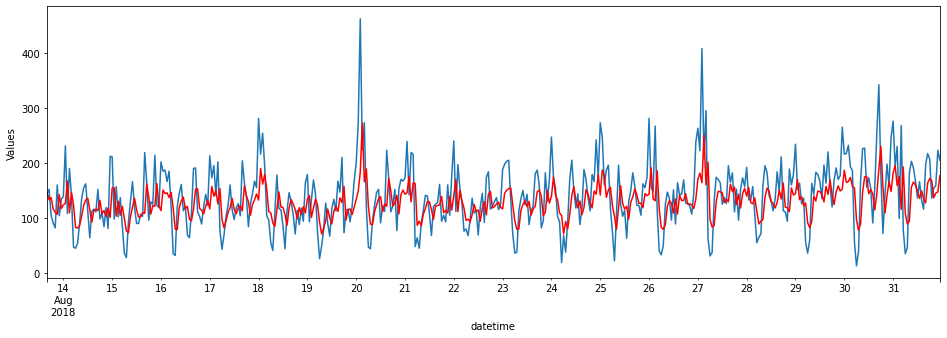

In [43]:
plt.figure(figsize(16,5))
linear_predict['target_test'].plot()
linear_predict['target_linear_pred'].plot(color='r')
plt.ylabel('Values')
pylab.show()

В общем, как-то так получается. 

Перейдем к следующей модели.

### SGDRegressor. Предсказание

In [44]:
start_time = time.time()

target_sgd_pred = sgd_regressor.predict(features_test)

sgd_regressor_test_rmse = mean_squared_error(target_test, target_sgd_pred, squared=False)

sgd_model_predicted_time = time.time() - start_time 

print('RMSE на тестовой выборке для линейной регрессии равен', 
      sgd_regressor_test_rmse)

RMSE на тестовой выборке для линейной регрессии равен 261145809687172.9


Здесь качество модели очень низкое. 

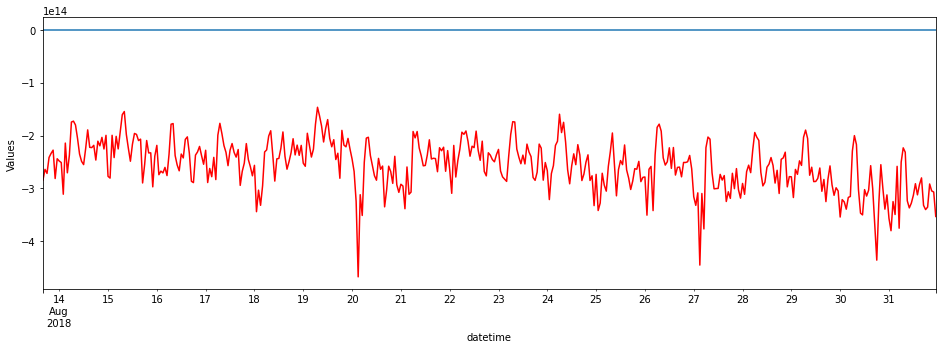

In [45]:
d = {'target_test': target_test, 'target_sgd_pred': target_sgd_pred}

sgd_predict = pd.DataFrame(data=d, index=target_test.index)

plt.figure(figsize(16,5))
sgd_predict['target_test'].plot()
sgd_predict['target_sgd_pred'].plot(color='r')
plt.ylabel('Values')
pylab.show()

Не знаю по какой причине, но эта модель явно не подходит для предсказания. 

### Градиентный бустинг. Предсказание

In [46]:
start_time = time.time()

target_gradient_model_pred = gradient_model.predict(features_test)

gradient_model_test_rmse = mean_squared_error(target_test, target_gradient_model_pred, squared=False)

gradient_model_predicted_time = time.time() - start_time

print('RMSE на тестовой выборке для линейной регрессии равен', 
      gradient_model_test_rmse)

RMSE на тестовой выборке для линейной регрессии равен 46.4485039424165


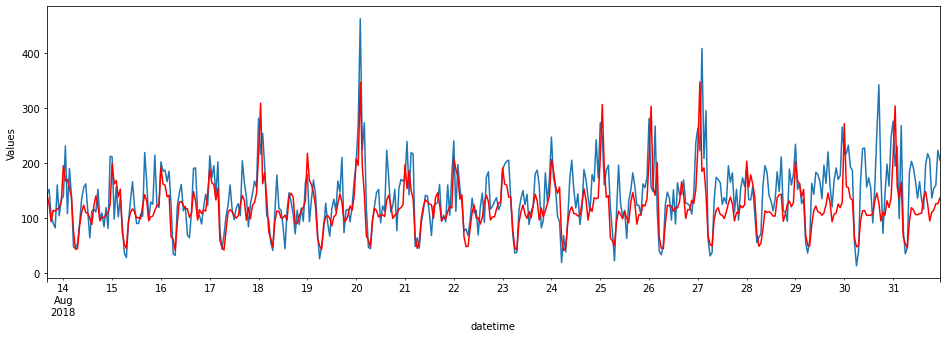

In [47]:
d = {'target_test': target_test, 'target_gradient_model_pred': target_gradient_model_pred}

gradient_model_predict = pd.DataFrame(data=d, index=target_test.index)

plt.figure(figsize(16,5))
gradient_model_predict['target_test'].plot()
gradient_model_predict['target_gradient_model_pred'].plot(color='r')
plt.ylabel('Values')
pylab.show()

Результаты примерно такие же, как и у линейной регрессии.

### CatBoostRegressor. Предсказание

In [48]:
start_time = time.time()

target_catboost_pred = catboost.predict(features_test)

catboost_test_rmse = mean_squared_error(target_test, target_catboost_pred, squared=False)

catboost_model_predicted_time = time.time() - start_time

print('RMSE на тестовой выборке для линейной регрессии равен', 
      catboost_test_rmse)

RMSE на тестовой выборке для линейной регрессии равен 46.898556210806504


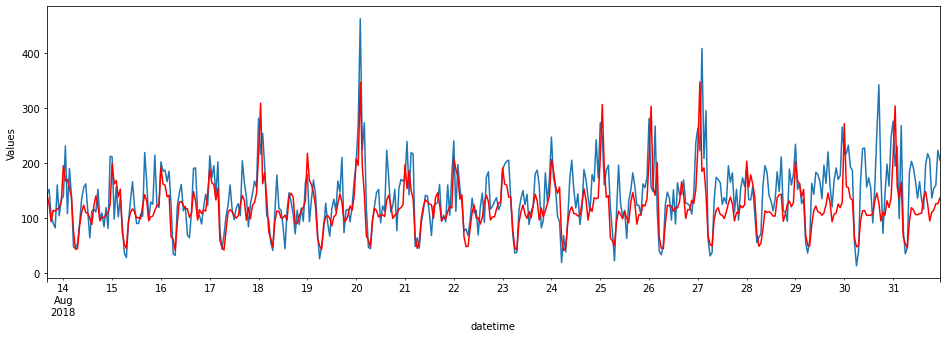

In [49]:
d = {'target_test': target_test, 'target_gradient_model_pred': target_catboost_pred}

сatboost_predict = pd.DataFrame(data=d, index=target_test.index)

plt.figure(figsize(16,5))
gradient_model_predict['target_test'].plot()
gradient_model_predict['target_gradient_model_pred'].plot(color='r')
plt.ylabel('Values')
pylab.show()

Объединим полученные результаты в единую сводную таблицу. 

### Общий вывод

In [50]:
pd.options.display.float_format = '{:,.2f}'.format

index = ['LinearRegression',
         'SGDRegressor',
         'GradientBoostingRegressor',
         'CatBoostRegressor']
data = {'RMSE на кросс-валидации':[cv_rmse_linear_model,
                                         cv_rmse_sgd_model,
                                         cv_rmse_gradient_model,
                                         cv_rmse_catboost_model],
        'RMSE модели на тестовой выборке':[linear_model_test_rmse,
                                                 sgd_regressor_test_rmse,
                                                 gradient_model_test_rmse,
                                                 catboost_test_rmse],
        'Время обучения модели, мин':[linear_model_fit_time,
                                      sgd_regressor_fit_time, 
                                      gradient_model_fit_time,
                                      catboost_model_fit_time],
        'Время предсказания модели, мин':[linear_model_predicted_time,
                                          sgd_model_predicted_time,
                                          gradient_model_predicted_time,
                                          catboost_model_predicted_time]}

scores_data = pd.DataFrame(data=data, index=index)

display(scores_data)

,RMSE на кросс-валидации,RMSE модели на тестовой выборке,"Время обучения модели, мин","Время предсказания модели, мин"
LinearRegression,32.91,51.89,0.00,0.00
SGDRegressor,"934,909,810,270,682.38","261,145,809,687,172.91",0.07,0.00
GradientBoostingRegressor,24.69,46.45,22.10,0.00
CatBoostRegressor,25.08,46.90,0.68,0.00


28:	learn: 17.9687743	total: 10.7ms	remaining: 26.3ms
29:	learn: 17.7630076	total: 11.2ms	remaining: 26.2ms
30:	learn: 17.6959899	total: 11.7ms	remaining: 26.1ms
31:	learn: 17.5836661	total: 12ms	remaining: 25.6ms
32:	learn: 17.4499591	total: 12.3ms	remaining: 25ms
33:	learn: 17.3420142	total: 12.7ms	remaining: 24.6ms
34:	learn: 17.2402235	total: 13ms	remaining: 24.1ms
35:	learn: 17.1082294	total: 13.3ms	remaining: 23.6ms
36:	learn: 16.9925806	total: 13.8ms	remaining: 23.5ms
37:	learn: 16.9329717	total: 14.3ms	remaining: 23.3ms
38:	learn: 16.8490957	total: 14.7ms	remaining: 23ms
39:	learn: 16.7458144	total: 15.1ms	remaining: 22.6ms
40:	learn: 16.6916162	total: 15.4ms	remaining: 22.2ms
41:	learn: 16.6338751	total: 15.8ms	remaining: 21.8ms
42:	learn: 16.5184076	total: 16.1ms	remaining: 21.4ms
43:	learn: 16.4547525	total: 16.4ms	remaining: 20.9ms
44:	learn: 16.3866684	total: 16.8ms	remaining: 20.5ms
45:	learn: 16.3317488	total: 17.1ms	remaining: 20.1ms
46:	learn: 16.2788986	total: 17.4ms	

**Вывод** 


В ходе работы над проектом я работала над предсказанием числа заказов на такси в аэропортах. В процессе были исследованы тренды и сезонность ряда, проведена проверка на стационарность ряда. 

Для предсказания были созданы новые переменные: календарные (день недели, месяц и час), скользящее среднее и лаги. 

Проведено обучение и тестирование 4-х моделей. 

Цель проекта заключалась в том, чтобы достичь RMSE на тестовой выборке ниже 48. 
Эта цель была достигнута на моделях градиентного бустинга и catboost. 